In [1]:
from google.colab import files
uploaded = files.upload()


Saving orders.csv to orders.csv
Saving users.json to users.json
Saving restaurants.sql to restaurants.sql


In [2]:
import pandas as pd
import sqlite3
import json


In [3]:
orders = pd.read_csv('orders.csv')
orders.head()


,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name
0,1,2508,450,18-02-2023,842.97,New Foods Chinese
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian


In [4]:
with open('users.json') as f:
    users_data = json.load(f)

users = pd.DataFrame(users_data)
users.head()


,user_id,name,city,membership
0,1,User_1,Chennai,Regular
1,2,User_2,Pune,Gold
2,3,User_3,Bangalore,Gold
3,4,User_4,Bangalore,Regular
4,5,User_5,Pune,Gold


In [5]:
# Create SQLite DB
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# Read SQL file and execute
with open('restaurants.sql', 'r') as sql_file:
    sql_script = sql_file.read()

cursor.executescript(sql_script)

# Load restaurants table into pandas
restaurants = pd.read_sql_query("SELECT * FROM restaurants;", conn)
restaurants.head()


,restaurant_id,restaurant_name,cuisine,rating
0,1,Restaurant_1,Chinese,4.8
1,2,Restaurant_2,Indian,4.1
2,3,Restaurant_3,Mexican,4.3
3,4,Restaurant_4,Chinese,4.1
4,5,Restaurant_5,Chinese,4.8


In [6]:
orders_users = orders.merge(
    users,
    on='user_id',
    how='left'
)


In [7]:
final_df = orders_users.merge(
    restaurants,
    on='restaurant_id',
    how='left'
)


In [8]:
final_df.head()
final_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_id           10000 non-null  int64  
 1   user_id            10000 non-null  int64  
 2   restaurant_id      10000 non-null  int64  
 3   order_date         10000 non-null  object 
 4   total_amount       10000 non-null  float64
 5   restaurant_name_x  10000 non-null  object 
 6   name               10000 non-null  object 
 7   city               10000 non-null  object 
 8   membership         10000 non-null  object 
 9   restaurant_name_y  10000 non-null  object 
 10  cuisine            10000 non-null  object 
 11  rating             10000 non-null  float64
dtypes: float64(2), int64(3), object(7)
memory usage: 937.6+ KB


In [9]:
final_df.to_csv('final_food_delivery_dataset.csv', index=False)


In [10]:
files.download('final_food_delivery_dataset.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
#Now all analysis must be done only on final_food_delivery_dataset.csv.
from google.colab import files
uploaded = files.upload()


Saving final_food_delivery_dataset.csv to final_food_delivery_dataset (1).csv


In [12]:
import pandas as pd

df = pd.read_csv('final_food_delivery_dataset.csv')
df.head()


,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,name,city,membership,restaurant_name_y,cuisine,rating
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,User_2508,Hyderabad,Regular,Restaurant_450,Mexican,3.2
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular,Restaurant_309,Indian,4.5
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold,Restaurant_107,Mexican,4.0
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold,Restaurant_224,Chinese,4.8
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular,Restaurant_293,Italian,3.0


In [13]:
df['order_date'] = pd.to_datetime(df['order_date'])


/tmp/ipython-input-2660814267.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['order_date'] = pd.to_datetime(df['order_date'])


<Axes: title={'center': 'Orders Per Day'}, xlabel='order_date'>

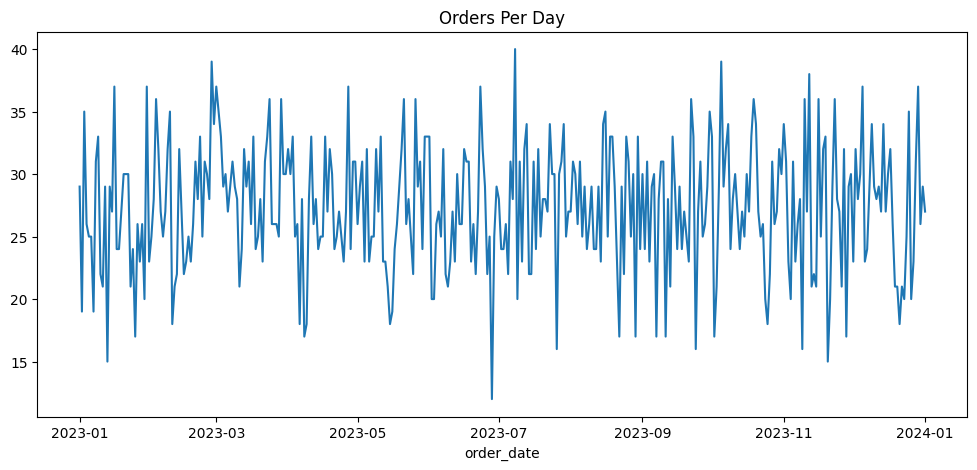

In [31]:
#Order Trends Over Time
#Orders per Day
orders_per_day = df.groupby(df['order_date'].dt.date)['order_id'].count()
orders_per_day.plot(figsize=(12,5), title='Orders Per Day')


<Axes: title={'center': 'Orders Per Month'}, xlabel='order_date'>

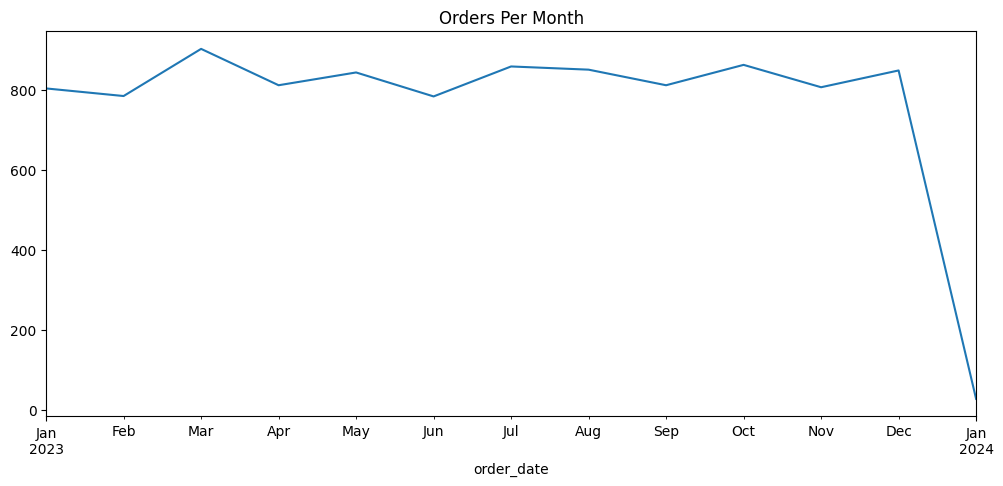

In [17]:
#Orders per Month
orders_per_month = df.groupby(df['order_date'].dt.to_period('M'))['order_id'].count()
orders_per_month.plot(figsize=(12,5), title='Orders Per Month')


<Axes: title={'center': 'Monthly Revenue Trend'}, xlabel='order_date'>

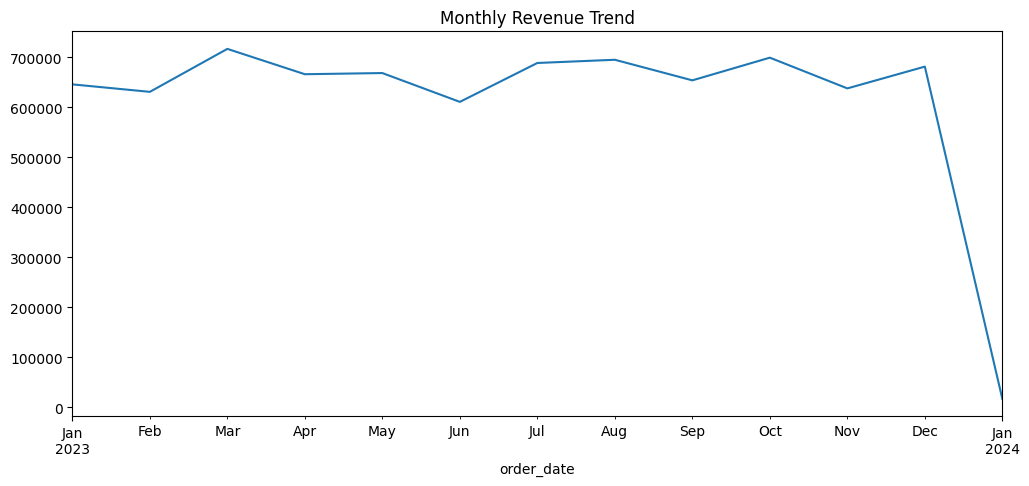

In [21]:
#Revenue Trend Over Time
revenue_trend = df.groupby(df['order_date'].dt.to_period('M'))['total_amount'].sum()
revenue_trend.plot(figsize=(12,5), title='Monthly Revenue Trend')



In [22]:
#User Behavior Patterns
#Repeat Users
user_order_counts = df.groupby('user_id')['order_id'].count()
repeat_users = user_order_counts[user_order_counts > 1].count()
repeat_users


np.int64(2539)

In [24]:
#Average Order Value per User
avg_order_value_user = df.groupby('user_id')['total_amount'].mean()
avg_order_value_user.head()



,total_amount
user_id,
1,1289.660
2,756.412
3,919.755
4,935.290
5,1148.576


In [25]:
#Gold vs Regular Activity
membership_orders = df.groupby('membership')['order_id'].count()
membership_orders


,order_id
membership,
Gold,4987
Regular,5013


In [27]:
#City-wise Performance
#City with Most Orders
city_orders = df.groupby('city')['order_id'].count().sort_values(ascending=False)
city_orders

#City with Most Revenue
city_revenue = df.groupby('city')['total_amount'].sum().sort_values(ascending=False)
city_revenue



,total_amount
city,
Bangalore,2206946.58
Chennai,1990513.03
Pune,1924797.93
Hyderabad,1889366.58


In [28]:
#Cuisine-wise Performance
#Most Popular Cuisine
cuisine_orders = df.groupby('cuisine')['order_id'].count().sort_values(ascending=False)
cuisine_orders

#Highest Revenue Cuisine
cuisine_revenue = df.groupby('cuisine')['total_amount'].sum().sort_values(ascending=False)
cuisine_revenue


,total_amount
cuisine,
Mexican,2085503.09
Italian,2024203.80
Indian,1971412.58
Chinese,1930504.65


In [29]:
#Membership Impact
#Revenue: Gold vs Regular
membership_revenue = df.groupby('membership')['total_amount'].sum()
membership_revenue

#Frequency: Gold vs Regular
membership_frequency = df.groupby('membership')['order_id'].count()
membership_frequency


,order_id
membership,
Gold,4987
Regular,5013


<Axes: title={'center': 'Weekly Seasonality'}, xlabel='day_of_week'>

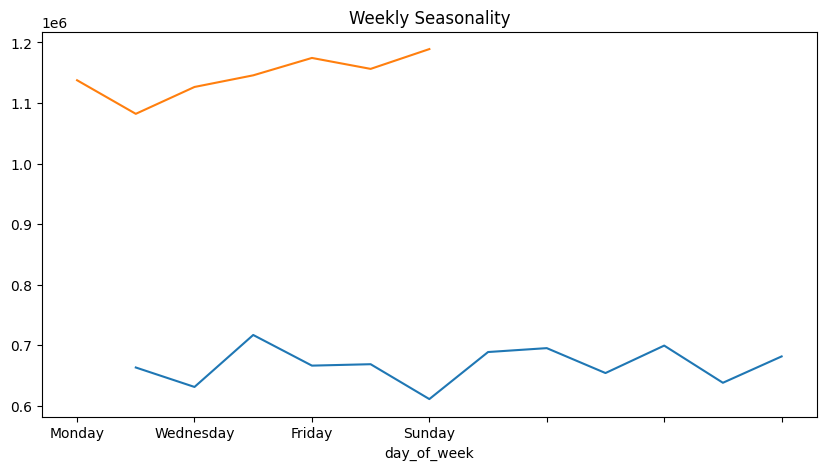

In [30]:
#Revenue Seasonality
#Monthly Seasonality
monthly_revenue = df.groupby(df['order_date'].dt.month)['total_amount'].sum()
monthly_revenue.plot(figsize=(10,5), title='Monthly Seasonality')

#Weekly Seasonality
df['day_of_week'] = df['order_date'].dt.day_name()

weekly_revenue = df.groupby('day_of_week')['total_amount'].sum()

weekly_revenue = weekly_revenue.reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)

weekly_revenue.plot(figsize=(10,5), title='Weekly Seasonality')